#  무역 데이터 전처리하기 
* [관세청 수출입 통계](https://unipass.customs.go.kr/ets/index.do) 에서 뽑은 자료입니다.
* 특정 국가에 대한 월별 수출입 건수와 금액(단위:천 불(USD 1,000))이 있습니다. 
* 무역수지는 수출금액-수입금액이 됩니다.

## 목차
1. Imputation 결측치 대치
2. Remove Duplication 중복값 제거
3. 이상치(Outlier)
4. 정규화(Normalization)
4. 원-핫 인코딩(One-Hot Encoding)
5. 구간화(Binning)

In [147]:
import pandas as pd


data = pd.read_csv("../data/trade.csv")
display(data)

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN
...,...,...,...,...,...,...,...,...
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0,NaN
195,2020년 05월,일본,166568.0,1798128.0,133763.0,3102734.0,-1304606.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN,NaN


#  대치(Imputation)


## 전체 데이터 수

In [6]:
print(data.shape)
print(len(data))

(199, 8)
199


## 결측치 갯수 구하기
### 방법 1

In [145]:
missing = len(data)  - data.count()
print(f"결측된 값 수\n {missing} ")

data.isnull()

결측된 값 수
 기간      0
국가명     0
수출건수    3
수출금액    4
수입건수    3
수입금액    3
무역수지    4
dtype: int64 


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


### 방법 2

In [176]:
null_flag_matrix = data.isnull()
display(null_flag_matrix)
display(null_flag_matrix.any())
display(null_flag_matrix.sum())
missing_values_columns = data.columns[null_flag_matrix.any()].tolist()
print(missing_values_columns)

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


기간      False
국가명     False
수출건수     True
수출금액     True
수입건수     True
수입금액     True
무역수지     True
dtype: bool

기간      0
국가명     0
수출건수    3
수출금액    4
수입건수    3
수입금액    3
무역수지    4
dtype: int64

['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']


기타사항의 경우 모든 데이터(199개)가 null이므로 아예 컬럼을 드롭한다.

In [149]:
data.drop("기타사항", axis=1, inplace=True)

In [177]:

imputated_data = data.dropna(how="all", subset=missing_values_columns[:-2])
print(imputated_data.isnull().sum())
display(imputated_data)

기간      0
국가명     0
수출건수    0
수출금액    1
수입건수    0
수입금액    0
무역수지    1
dtype: int64


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [178]:
tmp = imputated_data
missing_values_columns = imputated_data.columns[imputated_data.isnull().any()]
print(missing_values_columns)

for column in missing_values_columns:
    null_indices = tmp[tmp[column].isnull()].index.tolist()
    
    mean = tmp[column].mean()
    print(f"{column} column has null index {null_indices}. replace mean {mean}")
    for idx in null_indices:
        tmp.loc[idx, column] = mean

#display(imputated_data)

Index(['수출금액', '무역수지'], dtype='object')
수출금액 column has null index [191]. replace mean 6584132.543589744
무역수지 column has null index [191]. replace mean 1000691.8769230769


## 중복값 구하기

In [179]:
data[data.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


### 중복치 제거

In [180]:
data.drop_duplicates(inplace=True)

## 이상치 제거
### Z-Score Method
정규분포를 만들고 개개의 경우가 표준편차상에 어떤 위치를 차지하는지를 보여주는 차원없는 수치이다.  
입력 x에서 평균 $\mu$를 빼고 표준편자 $\sigma$로 나눠준다.  
편차가 평균으로부터 거리이므로 표준편차로 나눠주게 되면 -4, -3, -2, -1, 0, 1, 2, 3, 4 형태로 나타낼 수 있다.  
$$
z = \frac{x - \mu}{\sigma}
$$`
![](https://upload.wikimedia.org/wikipedia/commons/b/bb/Normal_distribution_and_scales.gif)
**[Referenece](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%EC%A0%90%EC%88%98#/media/%ED%8C%8C%EC%9D%BC:Normal_distribution_and_scales.gif)**

In [223]:
import numpy as np

def outlier_zscore(df, col, z):
    return df[abs(df[col] - np.mean(df[col]) )  / np.std(df[col]) > z].index

# Example. zscore 2.0 이상을 넘어가는 이상치를 찾는다
imputated_data.loc[outlier_zscore(imputated_data, '무역수지', 2.0)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


이상치가 아닌 것들만 뽑는 함수

In [165]:
def not_outlier_zscore(df, col, z):
    return df[abs(df[col] - np.mean(df[col]) )  /np.std(df[col]) <= z].index

#### z-score with median
. z-score를 계산하는데 쓰는 표준편차가 평균이 outlier의 영향을 받기 때문에  
이상치가 가져오는 왜곡을 가지고 이상치를 제거해야한다.  
이 때문에 z-score는 robust하지 않으며 데이터 수가 적을 경우 이상치 탐지를 잘 해내지 못한다.  
이를 개선하기 위해 mean과 standard deviation보다 중위값(median)과 중앙값 절대 편차(median absolute deviation)를 사용하면  
평균보다 상대적으로 중앙으로 데이터 모여있는 정도와 퍼져있는 정도를 측정하는 것에 대해 강인한다. (계산에 이상치가 관여하지 않으므로)  

0.6745를 곱해주는 이유는 MAD값이 표준편차보다 작은 값을 가지기 때문에 이상치가 없을 때 표준편차를 기준으로 스케일링 해주기 위해서라고 한다.
스케일링 기준은 $\frac{2}{3}\sigma$ 를 커버하는 범위라고 한다.

$$z_score = 0.6745 \times \frac{x - median}{mad}$$

**(reference)[https://www.reddit.com/r/AskStatistics/comments/m4en99/modified_zscore_question/]**

In [192]:
def outliers_modified_zscore(df, col, z):
    median = np.median(df[col])
    mad = np.median(abs(df[col] - median))
    return df[0.6745 * (df[col] - median)  / mad > z].index
    
imputated_data.loc[outliers_modified_zscore(imputated_data, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


###  IQR(Interquartile range)
z-score의 대안책으로 IQR 이 있다

![](https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg)
**[Reference](https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg)**

In [218]:
def outlier_iqr(df, col,):
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) 
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    return df.loc[(lower_bound > df[col]) | (upper_bound < df[col]) ]

Empty DataFrame
Columns: [기간, 국가명, 수출건수, 수출금액, 수입건수, 수입금액, 무역수지]
Index: []


## 정규화(Normalization)
### Standarization
평균 0, 분산 1을 갖도록 변환한다.  데이터 분포가 정규분포를 따를 때 사용한다.
$$\frac{x - \mu}{\sigma}$$


In [220]:
numeric = imputated_data.select_dtypes("number")
standarized = (numeric - numeric.mean()) / numeric.std()
display(standarized)

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.016301,1.392648e+00,-0.163573,1.269146,1.257524
1,-0.694577,-2.589367e-01,0.414021,-0.968522,0.400268
2,-0.852320,-1.097146e+00,-0.995248,-0.868388,-1.102106
3,-0.424298,8.466340e-01,-0.577434,0.693463,0.832398
4,-0.769827,-3.957452e-01,0.147118,-1.278970,0.437294
...,...,...,...,...,...
191,-0.170070,2.358269e-16,2.497990,-0.268390,0.000000
192,0.212068,-1.163485e+00,-0.801464,-0.788001,-1.283592
193,0.892443,1.053874e+00,-0.115777,1.688454,0.323133
194,0.112141,-5.022326e-01,2.550935,-0.640756,-0.293783


### 최소-최대값으로 스케일링 (Min-Max Scaling)
데이터의 범위를 0~1 사이로 표현한다. 확률분포를 모를 때 사용한다.

$$\frac{x - x_{min}}{x_{max} - x_{min}} $$

> Min-Max Scaler의 경우에만 학습과 테스트 데이터셋에 같은 기준을 적용시킨다. 

In [221]:
min = numeric.mean()
max = numeric.max()
scale = max - min
display((numeric - min) / scale)

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.002991,6.721100e-01,-0.050365,0.538571,0.515791
1,-0.127464,-1.249663e-01,0.127478,-0.410999,0.164176
2,-0.156412,-5.294970e-01,-0.306439,-0.368507,-0.452045
3,-0.077864,4.085967e-01,-0.177793,0.294276,0.341420
4,-0.141274,-1.909918e-01,0.045298,-0.542740,0.179362
...,...,...,...,...,...
191,-0.031210,1.138131e-16,0.769137,-0.113893,0.000000
192,0.038917,-5.615130e-01,-0.246773,-0.334394,-0.526484
193,0.163775,5.086133e-01,-0.035648,0.716507,0.132538
194,0.020579,-2.423841e-01,0.785439,-0.271909,-0.120499


## One-Hot Encoding

In [233]:
country = pd.get_dummies(imputated_data['국가명'], dtype=int)
one_hot_encoded_data = pd.concat([imputated_data, country], axis=1) 
one_hot_encoded_data.drop(["국가명"], axis=1, inplace=True)

display(country)
display(one_hot_encoded_data)

,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
191,1,0,0
192,0,1,0
193,0,0,1
194,1,0,0


,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,116932.0,1.208395e+07,334522.0,8143271.0,3.940676e+06,0,0,1
1,2015년 01월,65888.0,5.561545e+06,509564.0,3625062.0,1.936484e+06,1,0,0
2,2015년 01월,54017.0,2.251307e+06,82480.0,3827247.0,-1.575940e+06,0,1,0
3,2015년 02월,86228.0,9.927642e+06,209100.0,6980874.0,2.946768e+06,0,0,1
4,2015년 02월,60225.0,5.021264e+06,428678.0,2998216.0,2.023048e+06,1,0,0
...,...,...,...,...,...,...,...,...,...
191,2020년 04월,105360.0,6.584133e+06,1141118.0,5038739.0,1.000692e+06,1,0,0
192,2020년 04월,134118.0,1.989323e+06,141207.0,3989562.0,-2.000239e+06,0,1,0
193,2020년 05월,185320.0,1.074607e+07,349007.0,8989920.0,1.756149e+06,0,0,1
194,2020년 05월,126598.0,4.600726e+06,1157163.0,4286873.0,3.138530e+05,1,0,0


## 구간화(Binning, Bucketing)
연속적인 데이터를 구간을 나눠 분석할 때 사용

내가 지정한 범위로 나누기 [100000, 200000, 300000, 400000, 500000]
0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
194    (300000.0, 400000.0]
195                     NaN
196                     NaN
197                     NaN
198                     NaN
Name: 무역수지, Length: 198, dtype: category
Categories (4, interval[int64, right]): [(100000, 200000] < (200000, 300000] < (300000, 400000] < (400000, 500000]]
무역수지
(300000, 400000]    1
(100000, 200000]    2
(200000, 300000]    2
(400000, 500000]    3
Name: count, dtype: int64
5개의 범위로 나누기
0         (2915720.6, 4808179.8]
1         (1023261.4, 2915720.6]
2      (-2771119.296, -869197.8]
3         (2915720.6, 4808179.8]
4         (1023261.4, 2915720.6]
                 ...            
194       (-869197.8, 1023261.4]
195    (-2771119.296, -869197.8]
196                          NaN
197                          NaN
198               

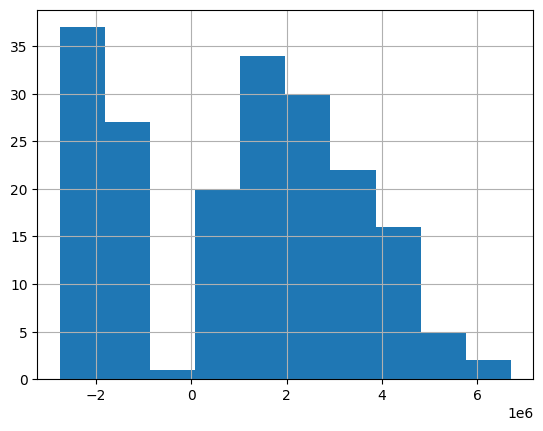

In [255]:
data['무역수지'].hist()
_bins = [100000, 200000, 300000, 400000, 500000]

print("\033[96m내가 지정한 범위로 나누기\033[0m", _bins)
_bin = pd.cut(data['무역수지'], bins=_bins)
print(_bin)
print(_bin.value_counts().sort_values())

_bin = pd.cut(data['무역수지'], bins=5)
print("\033[96m5개의 범위로 나누기\033[0m")
print(_bin)
print(_bin.value_counts().sort_values())

print("\033[96m데이터 분포가 고르게 5개의 bin으로 나누기\033[0m")
_bin = pd.qcut(data['무역수지'], q=5)
print(_bin)
print(_bin.value_counts().sort_values())